<a href="https://colab.research.google.com/github/Gabbovnzla/Coding_Dojo/blob/main/predicciones_de_ventas_de_alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
df = pd.read_csv("/content/drive/MyDrive/BOOTCAMP_CODING_DOJO(DATA_SCIENCE)/sales_predictions_2023.csv")

In [148]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas hay?

In [149]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 8523
Número de columnas: 12


2. ¿Cuáles son los tipos de datos de cada variable?

In [150]:
# Obtener los tipos de datos de cada variable
tipos_de_datos = df.dtypes

print("Tipos de datos de cada variable:")
print(tipos_de_datos)

Tipos de datos de cada variable:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


3) ¿Hay duplicados? Si es el caso, elimínelos.

In [151]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [152]:
# Verificar si hay duplicados
if df.duplicated().any():
    print("Se encontraron duplicados en el conjunto de datos.")

    # Eliminar duplicados
    data = df.drop_duplicates()
    print("Duplicados eliminados.")

# Guardar el conjunto de datos actualizado si es necesario
df.to_csv("archivo_de_ventas_sin_duplicados.csv", index=False)
print("El conjunto de datos se ha guardado sin duplicados.")

El conjunto de datos se ha guardado sin duplicados.


4) Identifique los valores faltantes.

In [153]:
# Identificar los valores faltantes
valores_faltantes = df.isna().sum()

print("Valores faltantes por variable:")
print(valores_faltantes)

Valores faltantes por variable:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


5) Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).

In [154]:
# Convertir valores faltantes en ceros: Prefiero convertirlos todos en ceros.
df.fillna(0, inplace=True)

# Guardar el conjunto de datos actualizado
df.to_csv("archivo_de_ventas_sin_faltantes.csv", index=False)
print("Los valores faltantes se han convertido en ceros y el conjunto de datos se ha guardado.")

Los valores faltantes se han convertido en ceros y el conjunto de datos se ha guardado.


6) Confirme que no hay valores faltantes después de tratarlos.

In [155]:
valores_faltantes = df.isna().sum()

print("Valores faltantes por variable después de tratarlos:")
print(valores_faltantes)

Valores faltantes por variable después de tratarlos:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


7) Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)

In [156]:
df["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [157]:
df["Item_Weight"].value_counts()

Item_Weight
0.000     1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: count, Length: 416, dtype: int64

In [158]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [159]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)

In [160]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [161]:
df["Item_Visibility"].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [162]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [163]:
df["Item_MRP"].value_counts()

Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

In [164]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [165]:
df["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [166]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
0         2410
Small     2388
High       932
Name: count, dtype: int64

In [167]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [168]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [169]:
df["Item_Outlet_Sales"].value_counts()

Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: count, Length: 3493, dtype: int64

In [170]:
df["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

8) Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)

In [171]:
#Las estadísticas resumidas de las columnas numéricas en el data son las siguientes:
estadisticas_resumidas = df.describe()

#Ahora se pide mostrar las estadísticas resumidas
print("Estadísticas resumidas de las columnas numéricas:")
print(estadisticas_resumidas)

Estadísticas resumidas de las columnas numéricas:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.650590         0.066132   140.992782                1997.831867   
std       6.431899         0.051598    62.275067                   8.371760   
min       0.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.9648

#Proyecto 1 - Parte 3 (Core)
Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos y como se relacionan los productos y los puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que nos pueda a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada uno de los siguientes gráficos:

Histograma para ver las distribuciones de las diversas características en el conjunto de datos.


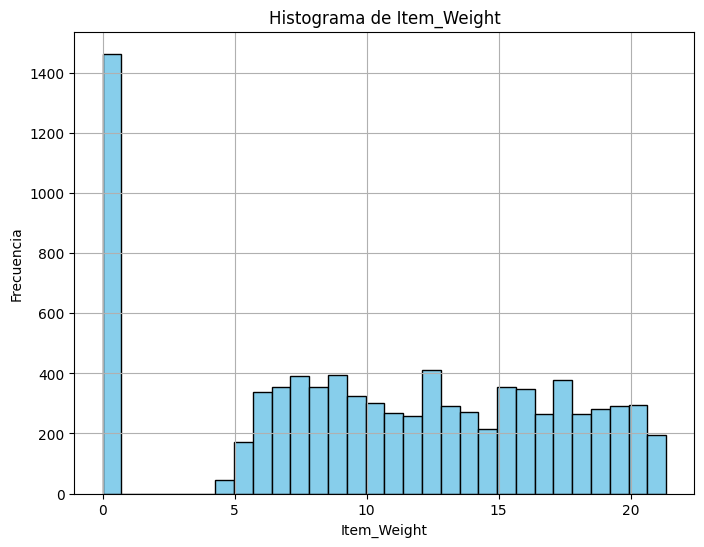

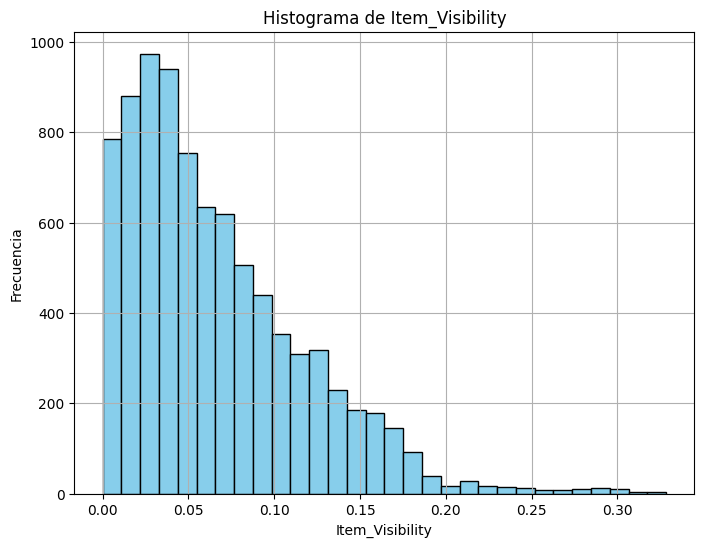

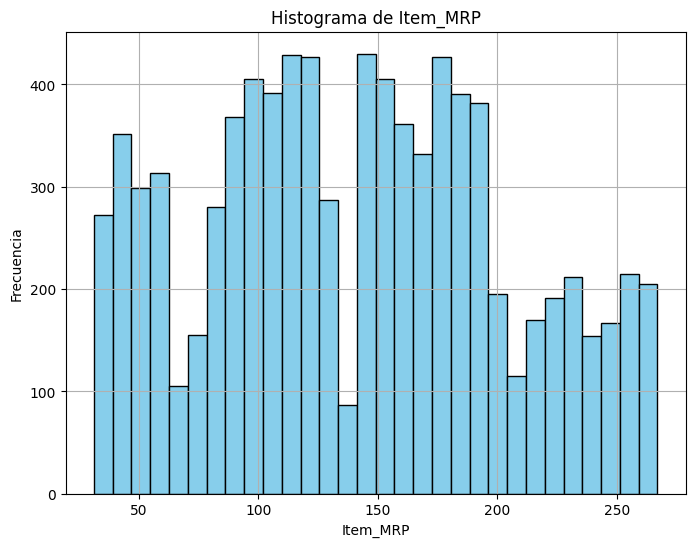

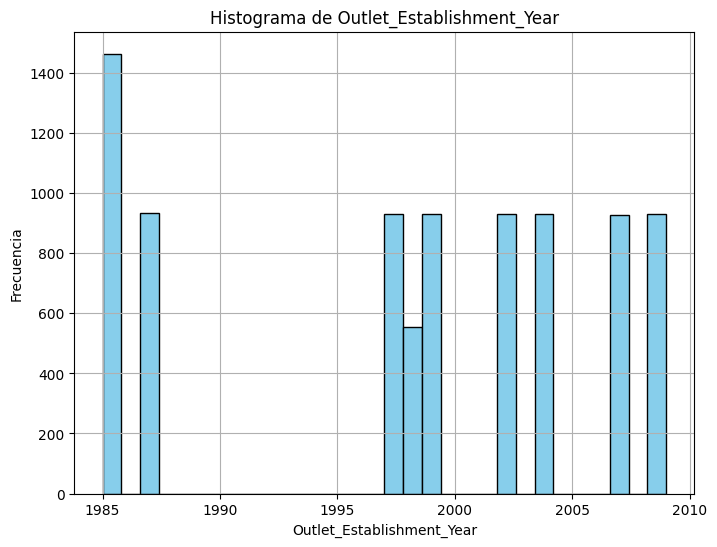

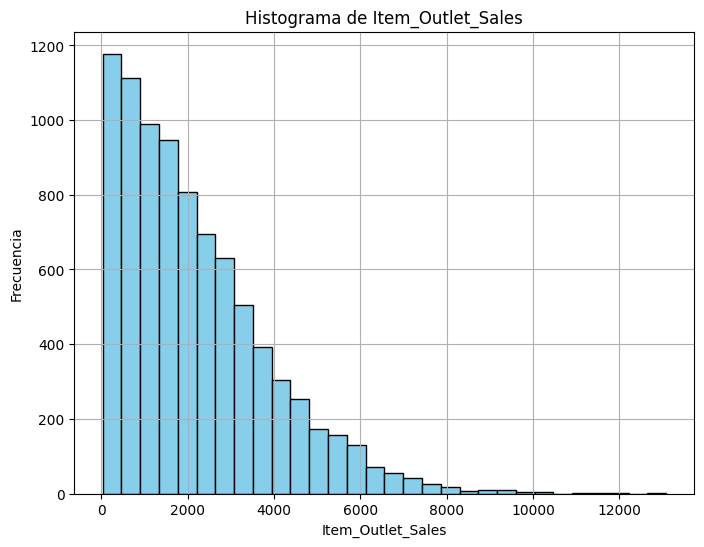

In [172]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

# Crear histogramas para cada columna numérica
for columna in columnas_numericas.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[columna], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

#Interpretaciones de Histogramas:
Histograma de Item_Weight: Peso del producto existe una columna que va desde 0 a 1400 lo cual es un renglón equivicado (a mi parecer) además, existe un vacio entre el peso de 0 a 5 lo cual es algo relativamente observable, mientras que, los datos de pesos oscilan entre una frecuencia aprox de 25 a 410.
Histograma de Item_Visibity: Porcentaje de área total de exposición de todos los productos para una tienda asignada al producto concreto. En este histograma se puede observar que los movimientos mas largos se dan entre el 20% y 30%

Histograma de Item_MRP: Precio máximo de venta al público (precio de catálogo) del producto. En este histograma se puede aprecia que los valores de los productos oscilan entre 100 y 150 de mayor rango, mientras que los otros están variando según precios de escala

Histograma de  Outlet_Establishment_Year: Año en que se estableció la tienda.  La tienda fue establecida en su creación en el año 1985 y tuvo un gran auge de ventas mientras que para el año 2010 sus ventas mantuvo una venta estable desde la caída en el año 1985

Histograma de Item_Outlet_Sales: Ventas del producto en una tienda particular. Esta la variable objetivo a predecir. Cierto productos tuvieron un alza y se mantuvieron subiendo desde el valor menor a un valor de 12.000, lo cual por su gran costo el valor ha sido vendido con muy poca regularidad


Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.

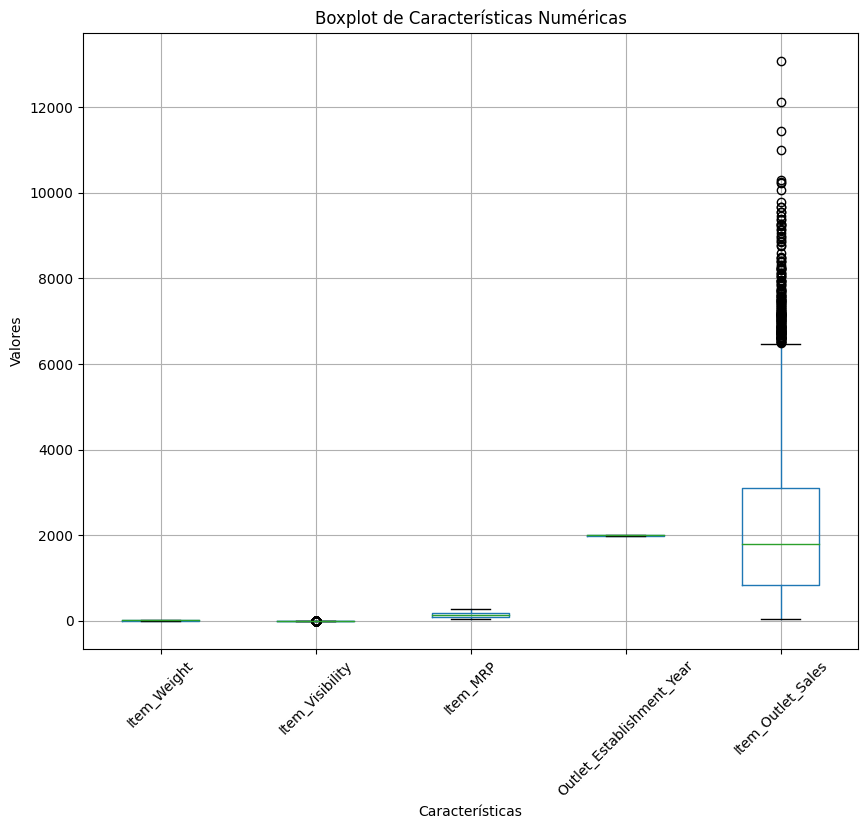

In [173]:
#Seleccionamos solo las columnas numéricas del df
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

#Crearemos un boxplots para cada columna numérica
plt.figure(figsize=(10, 8))
columnas_numericas.boxplot()
plt.title('Boxplot de Características Numéricas')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Mapa de calor de correlación entre las características.

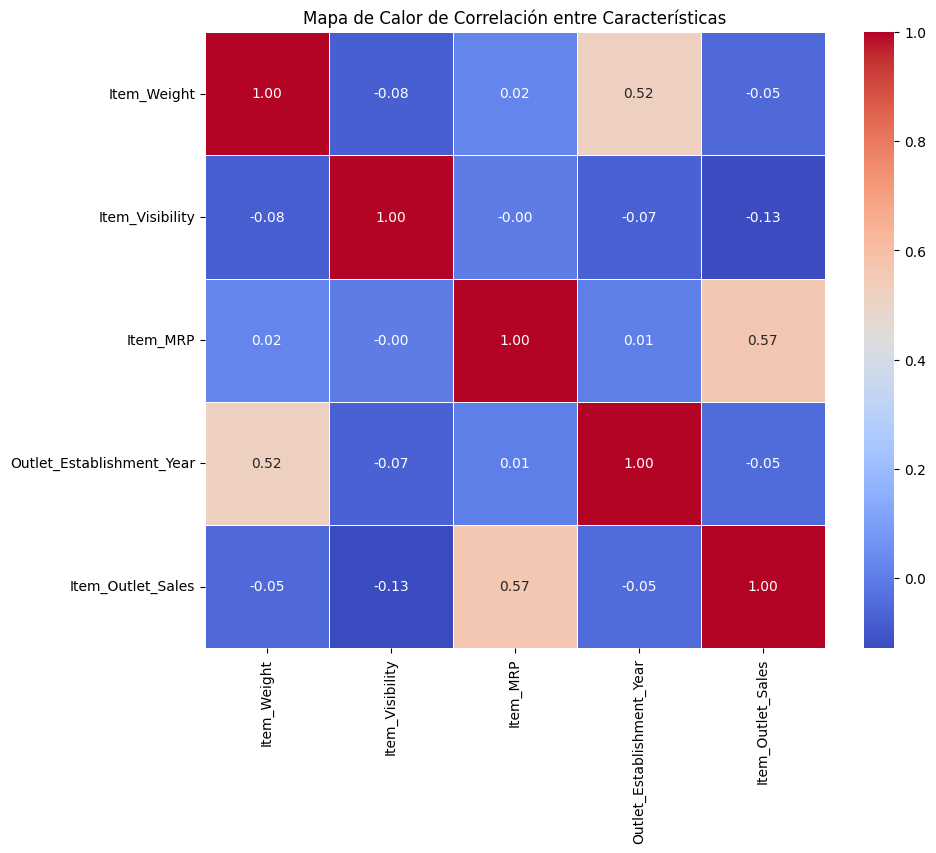

In [174]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

#Segun indicaciones, debemos calcular antes  la matriz de correlación
correlation_matrix = columnas_numericas.corr()

#Ahora vamos a crear el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Características')
plt.show()

#Interpretacion Mapa de Correlacion:
Los ítem MRP se encuentran con valores positivos  al igual que el Outlet_Est_Year

#Proyecto 1 - Parte 4 (Core)
Continuaremos trabajando en el proyecto de predicción de ventas.  es ayudar a un comerciante a comprender tanto las propiedades de los productos así como los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.​
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con diferentes visualizaciones y análisis.

• Reutilicen su limpieza, exploraciones y análisis anteriores.

• Creen un mínimo de dos visualizaciones de datos para ayudar a otros a comprender las tendencias en los datos (análisis de datos explicativos).


• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

#Explicacion de la 4ta Parte del Proeycto:
Se visualiza el identificador del producto (Item_Identifier), Precio máximo de venta al público (Item_MRP) y el punto de venta es una tienda de comestibles o algún tipo de supermercado (Outlet_Type). Se pide hacer un grafico de histograma interactivo. En pocas palabras, el gráfico de histograma interactivo generado muestra la distribución del precio máximo de venta al público para tiendas de comestibles y supermercados. Cada barra en el histograma representa un rango de precios, y la altura de la barra indica la frecuencia con la que ocurren precios dentro de ese rango.

Al explorar el gráfico, podemos observar la forma de la distribución de precios para cada tipo de punto de venta, así como identificar cualquier diferencia significativa en la distribución entre tiendas de comestibles y supermercados. Esto nos brinda información valiosa sobre cómo se distribuyen los precios máximos de venta al público en diferentes tipos de establecimientos.

In [ ]:
# Este grafico fue con la ayuda del YouTuber Dimas. En graficos con Python y Seaborn

In [175]:
# Primero nos sercionremos y eliminamos las filas con valores nulos en 'Outlet_Type'
df_clean = df.dropna(subset=['Outlet_Type'])

In [176]:
# Luego tenems que eparar los datos por tipo de punto de venta
grocery_data = df_clean[df_clean['Outlet_Type'] == 'Grocery Store']['Item_MRP']
supermarket_data = df_clean[df_clean['Outlet_Type'] != 'Grocery Store']['Item_MRP']

In [177]:
# Ahora si, a crear un histograma para tiendas de comestibles
grocery_hist = go.Histogram(x=grocery_data, name='Tiendas de Comestibles', opacity=0.5)

# Aqui viene el histograma para los supermercados
supermarket_hist = go.Histogram(x=supermarket_data, name='Supermercados', opacity=0.5)

# se configuran configuran c/ diseño y etiquetas
layout = go.Layout(title='Distribución del Precio Máximo de Venta por Tipo de Punto de Venta',
                   xaxis=dict(title='Precio Máximo de Venta al Público'),
                   yaxis=dict(title='Frecuencia'))

# Se va en la creacion de la figura que contiene los histogramas
fig = go.Figure(data=[grocery_hist, supermarket_hist], layout=layout)

fig.show()